In [1]:
import pandas as pd 
data_set = pd.read_csv('Alcohol_Sales.csv', index_col='DATE', parse_dates=True)

In [3]:
data_set

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


<AxesSubplot: xlabel='DATE'>

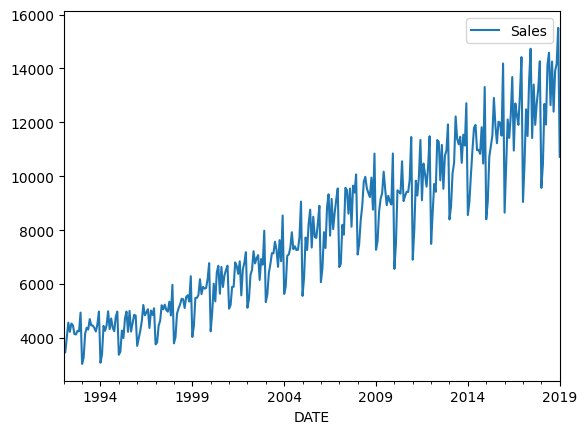

In [4]:
data_set.columns = ['Sales']
data_set.plot()

In [5]:
data_set['Sale_Last_Month'] = data_set['Sales'].shift(+1)
data_set['Sale_2Months_Back'] = data_set['Sales'].shift(+2)
data_set['Sale_3Months_Back'] = data_set['Sales'].shift(+3)
data_set

,Sales,Sale_Last_Month,Sale_2Months_Back,Sale_3Months_Back
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [6]:
data_set = data_set.dropna()
data_set

,Sales,Sale_Last_Month,Sale_2Months_Back,Sale_3Months_Back
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [8]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)

In [11]:
# Data Preprocessing
import numpy as np

x1 = np.array(data_set['Sale_Last_Month']).reshape(-1,1)
x2 = np.array(data_set['Sale_2Months_Back']).reshape(-1,1)
x3 = np.array(data_set['Sale_3Months_Back']).reshape(-1,1)
y =  np.array(data_set['Sales']).reshape(-1,1)


In [12]:
x = np.concatenate((x1,x2,x3), axis=1)
x

array([[ 4002.,  3458.,  3459.],
       [ 4564.,  4002.,  3458.],
       [ 4221.,  4564.,  4002.],
       [ 4529.,  4221.,  4564.],
       [ 4466.,  4529.,  4221.],
       [ 4137.,  4466.,  4529.],
       [ 4126.,  4137.,  4466.],
       [ 4259.,  4126.,  4137.],
       [ 4240.,  4259.,  4126.],
       [ 4936.,  4240.,  4259.],
       [ 3031.,  4936.,  4240.],
       [ 3261.,  3031.,  4936.],
       [ 4160.,  3261.,  3031.],
       [ 4377.,  4160.,  3261.],
       [ 4307.,  4377.,  4160.],
       [ 4696.,  4307.,  4377.],
       [ 4458.,  4696.,  4307.],
       [ 4457.,  4458.,  4696.],
       [ 4364.,  4457.,  4458.],
       [ 4236.,  4364.,  4457.],
       [ 4500.,  4236.,  4364.],
       [ 4974.,  4500.,  4236.],
       [ 3075.,  4974.,  4500.],
       [ 3377.,  3075.,  4974.],
       [ 4443.,  3377.,  3075.],
       [ 4261.,  4443.,  3377.],
       [ 4460.,  4261.,  4443.],
       [ 4985.,  4460.,  4261.],
       [ 4324.,  4985.,  4460.],
       [ 4719.,  4324.,  4985.],
       [ 4

In [14]:
X_train, X_test = x[:-30], x[-30:]
y_train, y_test = y[:-30], y[-30:]

In [16]:
model.fit(X_train, y_train)
lin_model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


LinearRegression()

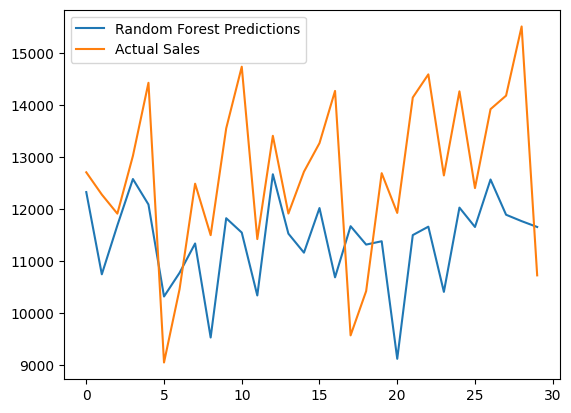

In [25]:
import matplotlib.pyplot as plt 

pred = model.predict(X_test)
plt.plot(pred, label='Random Forest Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend()
plt.show()

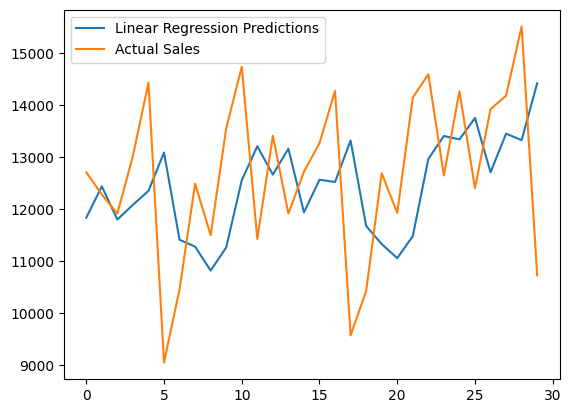

In [26]:
lin_pred = lin_model.predict(X_test)
plt.plot(lin_pred, label='Linear Regression Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend()
plt.show()

In [27]:
import math
from sklearn.metrics import mean_squared_error

rmse_rf = math.sqrt(mean_squared_error(pred, y_test))
rmse_lr = math.sqrt(mean_squared_error(lin_pred, y_test))

In [28]:
print('Mean Squared Error for Random Forest Model: ', rmse_rf)
print('Mean Squared Error for Linear Regression Model: ', rmse_lr)


Mean Squared Error for Random Forest Model:  1913.7762399350665
Mean Squared Error for Linear Regression Model:  1791.4965232759832


In [29]:
y_test.mean()

12664.1